In [1]:
##development
%load_ext extension_notebook_splitter

<div>
    <img src="static/FHAachen-logo2.svg" style="float: right;height: 15em;">
</div>
<div>
    <img src="static/IIIPIB_RWTH.png" style="float: right;height: 6.5em;">
</div>

**Einführung in die Physik im SS 2021** \
**Darius Mottaghy**        \
**Stefan Roth**

## Hausaufgabe 5: Periodische Bewegung

<div style= "color: black;background-color: rgba(0,177,172, 0.1) ;margin: 10 px auto; padding: 10px; border-radius: 10px">
<p style="font-size:12pt; text-align:center; color:   black;background-color: rgba(0,177,172, 0.1) ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>  Aufgabe - Fliehkraftregler </b>  </p> 
    
Ein Fliehkraftregler ist ein Maschinenelement, das die Fliehkraft zur Regelung der Drehzahl einer Maschine nutzt. 


<table cellpadding="0"><tbody><tr>
<td>
<p style="text-align:center;font-size:small;">
<img img src="static/flieh2.svg" alt="" role="presentation" class="img-responsive atto_image_button_middle" style="height:13em;">
<br>
<b>Abbildung</b>
</p>
</td>
<td width="20"></td>
<tr>
</tr>
</tbody></table> 

</div>    

**a)** Leiten sie den Zusammenhang zwischen dem Öffnungswinkel $\alpha$ und der Rotationsfrequenz $f$ in Abhängigkeit der Armlänge $l$ her. Sie können hierbei die Masse des Gestänges gegenüber den Gewichten vernachlässigen. Was muss bezüglich des Definitionsbereiches Ihrer Formel beachtet werden? Codetipp:  mit ``abs(x)`` kann man auf den Absolutbetrag der Variabel zugreifen. Implementieren Sie $\alpha$ als Funktion von $f$ und $l$.

In [2]:
%%task
import numpy as np
import scipy.constants as const

def alpha(l,f):
    #TODO

%%solution      
**Lösung**:       

Man setzt die Komponenten der Zentrifugalkraft und der Gewichtskraft senkrecht zur Stange gleich:

$$m\omega^2L\sin\alpha\cdot\cos\alpha = mg\cdot\sin\alpha$$

$$\alpha = \arccos \left(\frac{g}{L}\frac{1}{4\pi^2f^2}  \right)$$

In [3]:
%%solution
import numpy as np
import scipy.constants as const

def alpha(l,f):
    arg= const.g/(l*(2*np.pi*f)**2)
    if abs(arg) < 1:
        return np.arccos(arg)
    else:
        return 0.0

**b)** Plotten Sie für 1m, 2m und 3m Armlänge den Öffnungswinkel zwischen 0.1 und 2Hz.

In [4]:
%%task
import matplotlib.pyplot as plt

alpha=np.vectorize(alpha)
f= np.linspace(0.1,2, 100) #0.1 bis 2 Hz
l=[1,2,3] #m

#TODO plotten

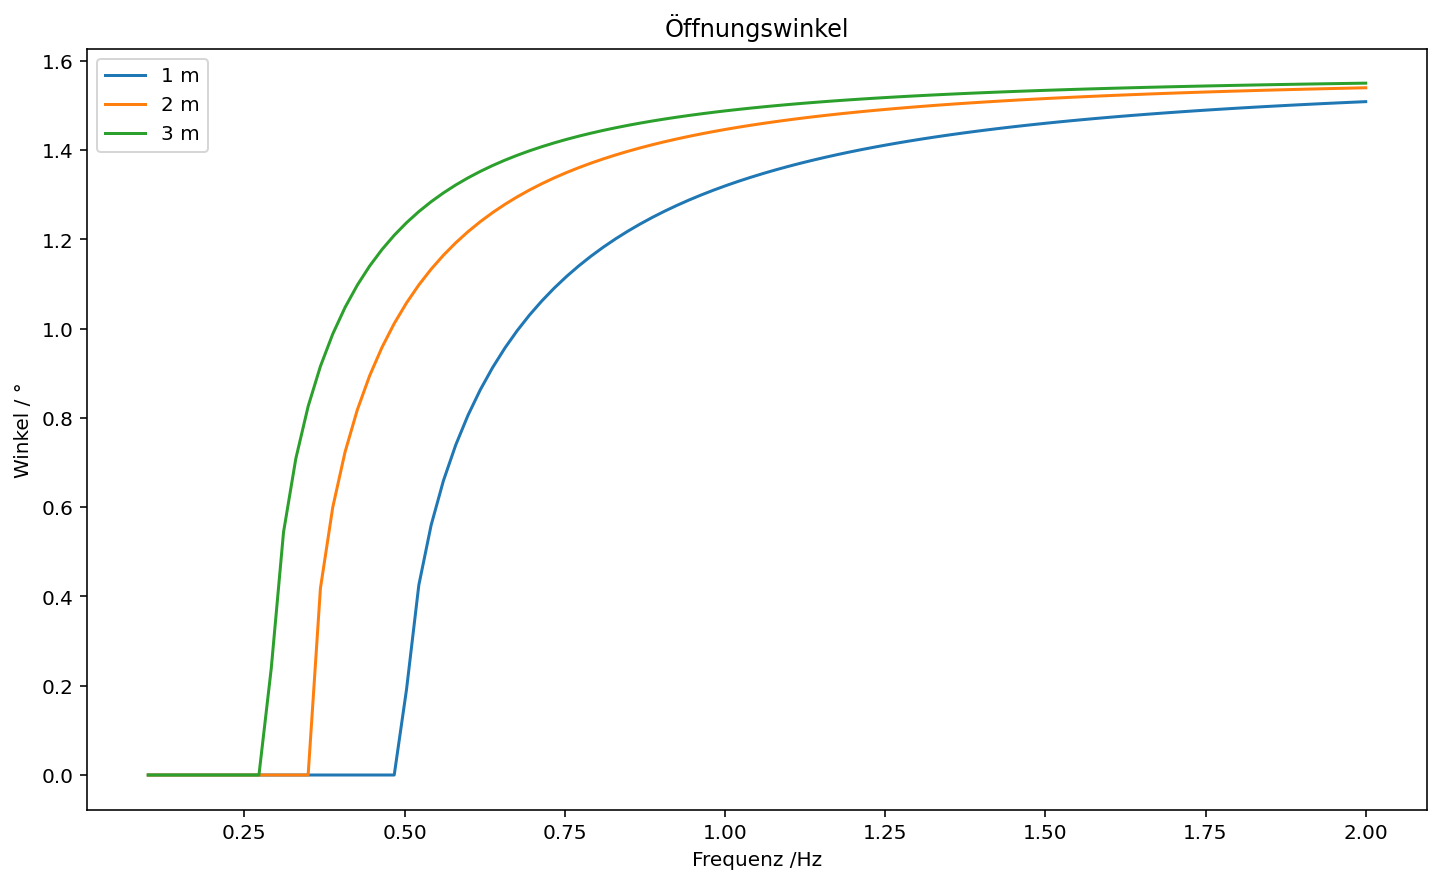

In [5]:
%%solution
import matplotlib.pyplot as plt

alpha=np.vectorize(alpha)
f= np.linspace(0.1,2, 100)
l=[1,2,3] #m
plt.title('Öffnungswinkel')
plt.xlabel('Frequenz /Hz')
plt.ylabel('Winkel / °')
for i in l:
    plt.plot(f, alpha(i,f), label='%i m'%(i))
    
plt.legend()

**c)** Ab welchen Rotationsfrequenzen kann der Fliehkraftregler regeln? Berechnen Sie die Mindestfrequenz für die Armlänge 0,1 m, 0,2 m, 0,3 m, 0,5 m, 1 m, 5 m, 10 m, 20 m, indem Sie eine <code>for</code>-Schleife verwenden. 

%%solution      
**Lösung**      
Um zu regeln, muss die Frequenz mindestens so groß sein, dass die Gewichte sich von der Drehachse wegbewegen, also

$$\alpha > 0 \Rightarrow \cos\alpha < 1$$

$$\frac{g}{L}\frac{1}{4\pi^2f^2}<1$$

$$f>\frac{1}{2\pi}\sqrt{\frac{g}{L}}$$

In [6]:
%%task
def Grenzfrequenz(l):
    #TODO

armlaenge = np.array([0.1, 0.2, 0.3, 0.5, 1, 5, 10, 20])
f = np.zeros()# speichern Sie darin die Mindestfrequenzen für verschieden Armlängen

for   : # ToDo

print('Die Grenzfrequenzen in Hz für die verschiedenen Armlängen sind',*f) #*f entpackt die Liste 


In [10]:
%%solution  
def Grenzfrequenz(l):
    return 1/(2*np.pi)*np.sqrt(const.g/l)

armlaenge = [0.1, 0.2, 0.3, 0.5, 1, 5, 10, 20]
f = np.zeros(len(armlaenge))
for i in range(0,len(f)):
    f[i] = Grenzfrequenz(armlaenge[i])
    
print('Die Grenzfrequenzen in Hz für die verschiedenen Armlängen sind',*f) #*f entpackt die Liste 

Die Grenzfrequenzen in Hz für die verschiedenen Armlängen sind 1.576088025433646 1.114462530531047 0.9099548457506613 0.70484799267861 0.49840279532877113 0.2228925061062094 0.1576088025433646 0.1114462530531047
